In [17]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [152]:
# Read in data

dataPath = 'data.csv'

start = time.time()
df = pd.read_csv(dataPath)
end = time.time()
print("Read csv without chunks: ",(end-start),"sec")

# Convert boolean column of booked to int
df["booked"] = df["booked"].astype(int)

# Filter out nan
df = df.dropna()

Read csv without chunks:  0.2698519229888916 sec


In [141]:
# Data overview
df.describe()


,Unnamed: 0,host_is_superhost,accommodates,bathrooms,bedrooms,beds,review_scores_rating,price,booked
count,362370.000000,362370.000000,362370.000000,362370.000000,362370.000000,362370.000000,362370.000000,362370.000000,362370.000000
mean,199642.820225,0.388774,3.354831,1.172696,1.445236,1.867621,4.730517,204.070204,0.685832
std,115380.538023,0.487472,2.259316,0.460526,0.806338,1.313301,0.376637,226.961953,0.464184
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.000000,0.000000
25%,98392.250000,0.000000,2.000000,1.000000,1.000000,1.000000,4.650000,90.000000,0.000000
50%,202274.500000,0.000000,2.000000,1.000000,1.000000,1.000000,4.830000,149.000000,1.000000
75%,300156.750000,1.000000,4.000000,1.000000,2.000000,2.000000,4.960000,245.000000,1.000000
max,396179.000000,1.000000,16.000000,7.000000,9.000000,18.000000,5.000000,9994.000000,1.000000


In [153]:
# Noarmalize data and select out target column

target_column = ['booked'] 
index_column = ['Unnamed: 0']
predictors = list(set(list(df.columns))-set(target_column)-set(index_column))
maxes = df[predictors].max()
df[predictors] = df[predictors]/maxes
df.describe()


bedrooms                   9.0
accommodates              16.0
review_scores_rating       5.0
price                   9994.0
beds                      18.0
host_is_superhost          1.0
bathrooms                  7.0
dtype: float64
bedrooms                   9.0
accommodates              16.0
review_scores_rating       5.0
price                   9994.0
beds                      18.0
host_is_superhost          1.0
bathrooms                  7.0
dtype: float64


In [45]:
# Create test vs train sets
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

# One hot encode outputs since booked is catagorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]

(253659, 7)
(108711, 7)


In [46]:
# Build model

model = Sequential()
model.add(Dense(500, activation='relu', input_dim=7))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])



In [49]:
# Train

model.fit(X_train, y_train, epochs=20, batch_size=50)

Epoch 1/20
5074/5074 [==============================] - 12s 2ms/step - loss: 0.5969 - accuracy: 0.7006
Epoch 2/20
5074/5074 [==============================] - 12s 2ms/step - loss: 0.5967 - accuracy: 0.7006
Epoch 3/20
5074/5074 [==============================] - 11s 2ms/step - loss: 0.5965 - accuracy: 0.7009
Epoch 4/20
5074/5074 [==============================] - 12s 2ms/step - loss: 0.5959 - accuracy: 0.7015
Epoch 5/20
5074/5074 [==============================] - 10s 2ms/step - loss: 0.5955 - accuracy: 0.7017
Epoch 6/20
5074/5074 [==============================] - 10s 2ms/step - loss: 0.5950 - accuracy: 0.7018
Epoch 7/20
5074/5074 [==============================] - 10s 2ms/step - loss: 0.5949 - accuracy: 0.7026
Epoch 8/20
5074/5074 [==============================] - 10s 2ms/step - loss: 0.5945 - accuracy: 0.7024
Epoch 9/20
5074/5074 [==============================] - 9s 2ms/step - loss: 0.5942 - accuracy: 0.7022
Epoch 10/20
5074/5074 [==============================] - 9s 2ms/step - los

In [50]:
# Evaluate

pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1])) 




Accuracy on training data: 0.7045994997024536% 
 Error on training data: 0.2954005002975464
Accuracy on test data: 0.703893780708313% 
 Error on test data: 0.296106219291687


In [191]:
# print(X_test)

test = model.predict(X_test)


In [197]:
notbooked = []

for answer in test:
    if answer[0] > answer[1]:
        notbooked.append(answer)
    
print("Percent of predicted not booked entries: ",len(notbooked)/len(test))

numNotBookedTest = 0

print(len(y_test))

for item in y_train:
    if item[0] > item[1]:
        numNotBookedTest += 1

print("Percent of not booked entries in training: ",numNotBookedTest/len(y_train))







Percent of predicted not booked entries:  0.07036086504585552
108711
Percent of not booked entries in training:  0.31403577243464653


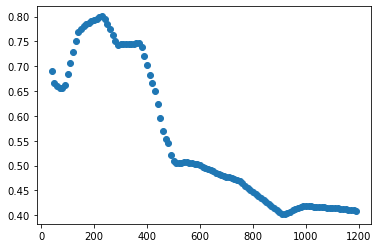

In [174]:
# Analysis of how price is being modeled

# Sample property
# host_is_superhost	accommodates	bathrooms	bedrooms	beds	review_scores_rating	price	

# Build test set

properties = np.array([[0, 2, 1, 1, 1, 4.9, 40]])

for price in range(50, 1200, 10):
    properties = np.vstack([properties, [0, 2, 1, 1, 1, 4.9, price]])

# print(properties) 
# sampleProperty = np.array([[0, 2, 1, 1, 1, 4.9, 150]])
samplePropertyDf = pd.DataFrame({'host_is_superhost': properties[:, 0], 'accommodates': properties[:, 1], 'bathrooms': properties[:, 2], 'bedrooms': properties[:, 3], 'beds': properties[:, 4], 'review_scores_rating': properties[:, 5], 'price': properties[:, 6]})

# Normalize
samplePropertyDf[predictors] = samplePropertyDf[predictors]/maxes

# print(samplePropertyDf[predictors])

test = model.predict(samplePropertyDf[predictors])

# print(test)

plt.scatter(properties[:,6],test[:,1])
plt.show()

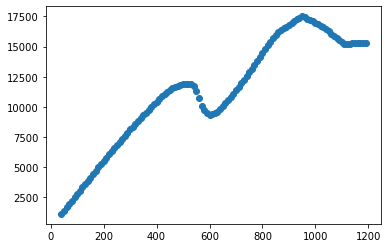

In [179]:
# Revenue

plt.scatter(properties[:,6],(test[:,1]*30)*properties[:,6])
plt.show()

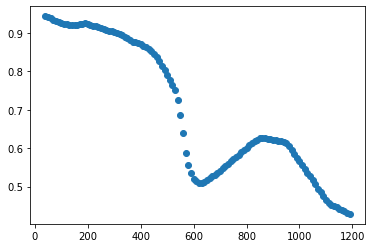

In [177]:
# Analysis of how price is being modeled

# Sample property
# host_is_superhost	accommodates	bathrooms	bedrooms	beds	review_scores_rating	price	

# Build test set

properties = np.array([[0, 6, 2, 4, 4, 4.5, 40]])

for price in range(50, 1200, 10):
    properties = np.vstack([properties, [0, 6, 2, 4, 4, 4.5, price]])

# print(properties) 
# sampleProperty = np.array([[0, 2, 1, 1, 1, 4.9, 150]])
samplePropertyDf = pd.DataFrame({'host_is_superhost': properties[:, 0], 'accommodates': properties[:, 1], 'bathrooms': properties[:, 2], 'bedrooms': properties[:, 3], 'beds': properties[:, 4], 'review_scores_rating': properties[:, 5], 'price': properties[:, 6]})

# Normalize
samplePropertyDf[predictors] = samplePropertyDf[predictors]/maxes

# print(samplePropertyDf[predictors])

test = model.predict(samplePropertyDf[predictors])

# print(test)

plt.scatter(properties[:,6],test[:,1])
plt.show()